In [102]:
import pandas as pd

data = pd.read_csv('anthems.csv')
data.head()

,Country,Alpha-2,Alpha-3,Continent,Anthem
0,Albania,AL,ALB,Europe,"Around our flag we stand united, With one wish..."
1,Armenia,AM,ARM,Europe,"Our Fatherland, free, independent, That has fo..."
2,Austria,AT,AUT,Europe,"Land of mountains, land by the river, Land of ..."
3,Azerbaijan,AZ,AZE,Europe,"Azerbaijan, Azerbaijan! The glorious Fatherlan..."
4,Belarus,BY,BLR,Europe,"We, Belarusians, are peaceful people, Wholehea..."


In [103]:
data.Anthem[0].lower()

'around our flag we stand united, with one wish and one goal, a sacred oath we bestow upon it proclaiming loyalty for our salvation. from war abstains only he, who a traitor is born, he who is a true man is not frightened, but dies a warrior to the cause. with weapons in our hands a-brandished, we will defend our fatherland, our sacred rights weã¢â‚¬â„¢ll not relinquish, the foe has no place in our land. for god himself proclaimed the nations of the earth shall wane, and yet will live, will thrive albania. for you, for you we fight. o flag, flag, you sacred symbol upon you we now swear for albania, our dear fatherland for honour and your glory. brave man is named and honoured the one who sacrificed himself for the fatherland forever he will be remembered on earth and under as a saint!'

In [104]:
# First we need to rempve the punchuation from the anthem
def remove_punch(source):
    dst = ''
    punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    for ele in source:
        if ele not in punc:
            dst+=ele
            
    return dst

data.Anthem = data.Anthem.apply(remove_punch)
data.sample(3)

,Country,Alpha-2,Alpha-3,Continent,Anthem
80,Australia,AU,AUS,Oceania,Australians all let us rejoice For we are youn...
46,Brazil,BR,BRA,South_America,The placid shores of the Ipiranga heard the re...
135,Angola,AO,AGO,Africa,O Fatherland we shall never forget The heroes ...


In [105]:
# removing tbhe stop words


from nltk.corpus import stopwords
stop =  stopwords.words('english')
type(stop)


def delstop(anth):
    words=anth.split()
    passeed = []
    for wrd in words :
        if wrd not in stop:
            passeed.append(wrd)
            
    return " ".join(passeed)

data['Anthem'] = data.Anthem.apply(lambda x : x.lower())
data['Anthem'] = data.Anthem.apply(delstop)
data.head()

,Country,Alpha-2,Alpha-3,Continent,Anthem
0,Albania,AL,ALB,Europe,around flag stand united one wish one goal sac...
1,Armenia,AM,ARM,Europe,fatherland free independent centuries lived su...
2,Austria,AT,AUT,Europe,land mountains land river land fields land cat...
3,Azerbaijan,AZ,AZE,Europe,azerbaijan azerbaijan glorious fatherland valo...
4,Belarus,BY,BLR,Europe,belarusians peaceful people wholeheartedly dev...


In [106]:
data.Anthem[2]

'land mountains land river land fields land cathedrals land hammers promising future home great daughters sons people highly gifted beautiful arts muchpraised austria strongly feuded fiercely hardfought thou liest middle continent like strong heart since early days ancestors thou hast borne burden high mission muchtried austria bravely towards new ages see us striding free faithful assiduous full hope unified let us jolly choirs pledge allegiance thee fatherland muchbeloved austria'

In [107]:
# Getting the stem words forn the anthems

from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

stemmer = PorterStemmer()

stemed_anthems = []
for anthem in data['Anthem']:
    
    # tecjnically splitting the words then splitting
    words = word_tokenize(anthem)
    stemed_words = [stemmer.stem(word) for word in words]
    
    # Now joining the words
    stemed_anthems.append(' '.join(stemed_words))
    
data.Anthem = stemed_anthems
data.Anthem[2]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


'land mountain land river land field land cathedr land hammer promis futur home great daughter son peopl highli gift beauti art muchprais austria strongli feud fierc hardfought thou liest middl contin like strong heart sinc earli day ancestor thou hast born burden high mission muchtri austria brave toward new age see us stride free faith assidu full hope unifi let us jolli choir pledg allegi thee fatherland muchbelov austria'

In [108]:
# First we need to convert the words to the vectors 

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

mat = vectorizer.fit_transform(data.Anthem)



In [109]:
# now we need to perform clustering in the matrix data

from sklearn.cluster import KMeans

num_of_cluster = 5
kmeans = KMeans(n_clusters=num_of_cluster, random_state= len(data))
kmeans.fit(mat)

cluster = kmeans.labels_
cluster

e:\Setup\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 2, 3, 3, 2, 1, 1, 1, 0, 3, 1, 0, 4, 1, 3, 1, 1, 3, 1, 3, 2, 2,
       3, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4, 1, 2, 0, 3, 2, 2, 0, 1, 1, 1, 4,
       0, 2, 3, 4, 1, 4, 1, 2, 1, 4, 2, 4, 1, 3, 2, 2, 2, 4, 1, 0, 0, 3,
       0, 4, 0, 3, 2, 4, 3, 3, 4, 4, 3, 3, 1, 0, 4, 4, 3, 4, 1, 1, 0, 4,
       3, 1, 1, 1, 3, 4, 3, 0, 4, 3, 3, 1, 2, 0, 4, 2, 0, 0, 1, 2, 0, 4,
       4, 4, 0, 4, 1, 0, 1, 0, 1, 3, 1, 0, 4, 0, 3, 0, 0, 2, 4, 0, 0, 0,
       0, 1, 2, 4, 4, 4, 2, 0, 3, 1, 2, 1, 4, 4, 0, 3, 4, 0, 1, 4, 4, 3,
       4, 1, 3, 4, 0, 1, 0, 4, 0, 4, 3, 3, 4, 1, 0, 4, 1, 4, 0, 2, 0, 4,
       0, 3, 0, 0, 4, 2, 0, 0, 4, 2, 3, 1, 1, 4])

In [110]:
# Addng the cluster in the dta

data['Cluster'] = cluster
data.head(10)

,Country,Alpha-2,Alpha-3,Continent,Anthem,Cluster
0,Albania,AL,ALB,Europe,around flag stand unit one wish one goal sacr ...,2
1,Armenia,AM,ARM,Europe,fatherland free independ centuri live summon s...,2
2,Austria,AT,AUT,Europe,land mountain land river land field land cathe...,3
3,Azerbaijan,AZ,AZE,Europe,azerbaijan azerbaijan gloriou fatherland valor...,3
4,Belarus,BY,BLR,Europe,belarusian peac peopl wholeheartedli devot mot...,2
5,Belgium,BE,BEL,Europe,dear belgium holi land father ã¢â‚¬â€œ soul he...,1
6,Bosnia and Herzegovina,BA,BIH,Europe,your light soul etern fire flame mother land b...,1
7,Bulgaria,BG,BGR,Europe,proud balkan mountain next danub sparkl sun sh...,1
8,Croatia,HR,HRV,Europe,beauti homeland oh fearless graciou father anc...,0
9,Cyprus,CY,CYP,Europe,knew thee old divin restor light thine eye lig...,3


In [111]:
grouped = data.groupby(['Cluster', 'Continent']).size().reset_index(name='Count')
grouped

,Cluster,Continent,Count
0,0,Africa,14
1,0,Asia,16
2,0,Europe,4
3,0,North_America,5
4,0,Oceania,1
5,0,South_America,1
6,1,Africa,9
7,1,Asia,9
8,1,Europe,19
9,1,North_America,3


C:\Users\Ayush\AppData\Local\Temp\ipykernel_18924\1151541486.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


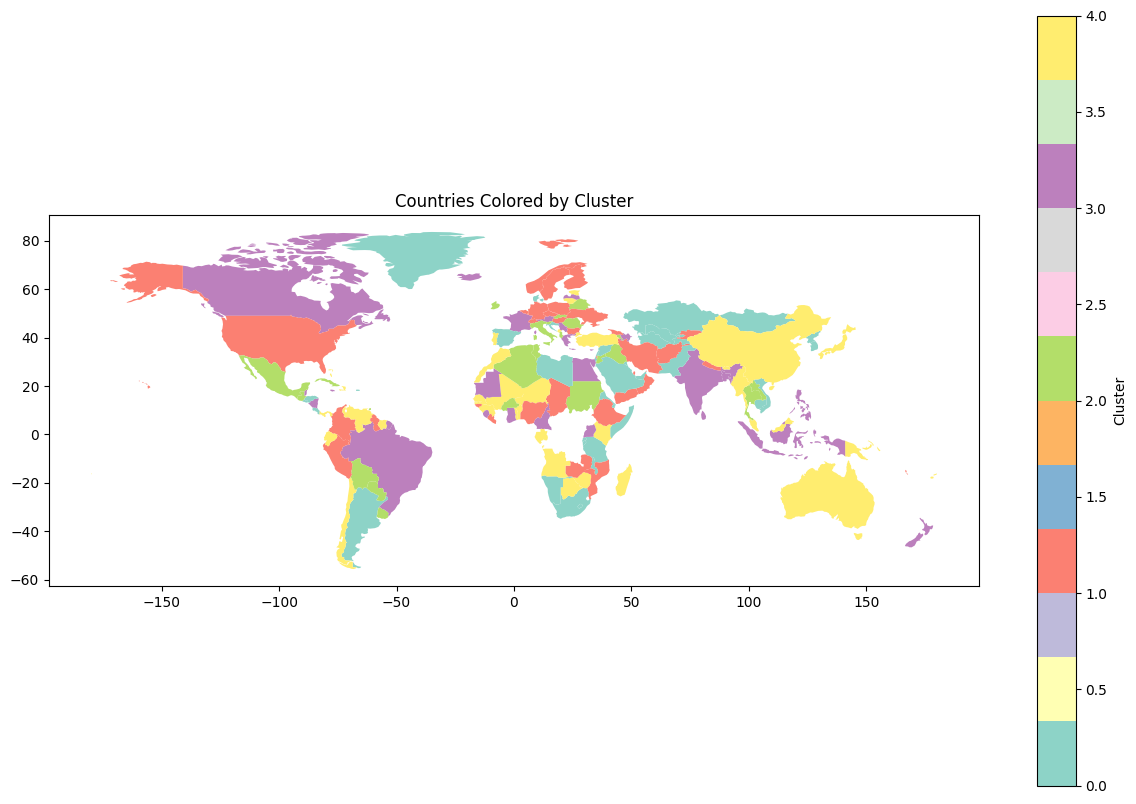

In [112]:
# Makign the map of the world -> Usign gpt

import geopandas as gpd
import matplotlib.pyplot as plt

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world = world.merge(data, left_on = 'name', right_on= 'Country')
world.head()


fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column='Cluster', ax=ax, legend=True, cmap='Set3', legend_kwds={'label': "Cluster"})
plt.title('Countries Colored by Cluster')
plt.show()

In [113]:
world.isnull().sum()

pop_est       0
continent     0
name          0
iso_a3        0
gdp_md_est    0
geometry      0
Country       0
Alpha-2       1
Alpha-3       0
Continent     0
Anthem        0
Cluster       0
dtype: int64